Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from wordcloud import WordCloud
from scipy.stats import pearsonr

I am mapping the category_id of each video to its category in the code below

In [55]:
df = pd.read_csv('youtube_data.csv')


categories = pd.read_csv('youtube_categories.csv')
categories.head()

df = df.merge(categories, on = 'category_id', how = 'left')
df = df.drop_duplicates(subset = 'video_id')

In [56]:
df.head()

,published_at,video_id,channel_id,title,channel_title,view_count,like_count,comment_count,tags,duration,category_id,timestamp,category_title
0,2023-04-17 16:00:14,3inw26U-os4,UCKsN6xyJ2w8g7p4p9apXkYQ,Grupo Frontera x Bad Bunny - un x100to (Video ...,Grupo Frontera,18533453,978908,30640,"['bad bunny', 'grupo frontera', 'frontera', 'f...",3.250000,10,2023-04-19 10:53:26.617027,Music
1,2023-04-18 21:10:35,yRCzziLUvYs,UCET00YnetHT7tOpu12v8jxg,Chelsea vs. Real Madrid: Extended Highlights |...,CBS Sports Golazo,803230,9056,1117,"['Champions League', 'Europa League', 'Soccer'...",11.750000,17,2023-04-19 10:53:26.617027,Sports
2,2023-04-19 05:45:07,gUmE_TRdp0s,UCJ0uqCI0Vqr2Rrt1HseGirg,BLACKPINK Carpool Karaoke,The Late Late Show with James Corden,3456456,495906,18189,"['The Late Late Show', 'Late Late Show', 'Jame...",14.366667,24,2023-04-19 10:53:26.617027,Entertainment
3,2023-04-18 15:00:30,QxS7KDYQBWs,UC071KjEQUoDUe3FvDU6j02Q,Freestyle with Love is Blind’s Marshall Glaze ...,Nick Viall,267261,6265,1348,"['nick viall', 'bachelor', 'abc', 'viall files...",92.783333,22,2023-04-19 10:53:26.617027,People & Blogs
4,2023-04-18 04:30:35,koHXg0PlYq8,UC9-OpMMVoNP5o10_Iyq7Ndw,Draymond Ejected After STEPPING On Sabonis 😳,Bleacher Report,683683,3665,3691,"['bleacher report', 'br', 'nba', 'basketball',...",0.966667,17,2023-04-19 10:53:26.617027,Sports


In [57]:
df.columns

Index(['published_at', 'video_id', 'channel_id', 'title', 'channel_title',
       'view_count', 'like_count', 'comment_count', 'tags', 'duration',
       'category_id', 'timestamp', 'category_title'],
      dtype='object')

In [58]:
df.dtypes

published_at       object
video_id           object
channel_id         object
title              object
channel_title      object
view_count          int64
like_count          int64
comment_count       int64
tags               object
duration          float64
category_id         int64
timestamp          object
category_title     object
dtype: object

Converting string representation of lists to lists

In [59]:
df['tags'] = df['tags'].apply(lambda x: eval(x))

Questions
- Does the time of day a video is uploaded affect views, likes, comments? 
- Does the number of tags affect views, likes, comments? (done)
- Does title length (words and characters) affect views, likes, comments? (done)
- How does video duration affect views, likes, comments? (done)
- Top 3 trending videos
- Number of UPPERCASE letters vs views (done)
- What are the most popular categories in trending (done)

What is the relationship between number of tags and views, likes, and comments?

In [60]:
#function for formatting y axis by adding commas for readability
def format_y_axis_commas(ax):
    fmt = '{x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)

In [61]:
#function for making scatterplots
def make_scatter(x, y, xtitle, ytitle, title):
    ax = sns.scatterplot(x = x, y = y)
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.title(title)
    format_y_axis_commas(ax = ax)

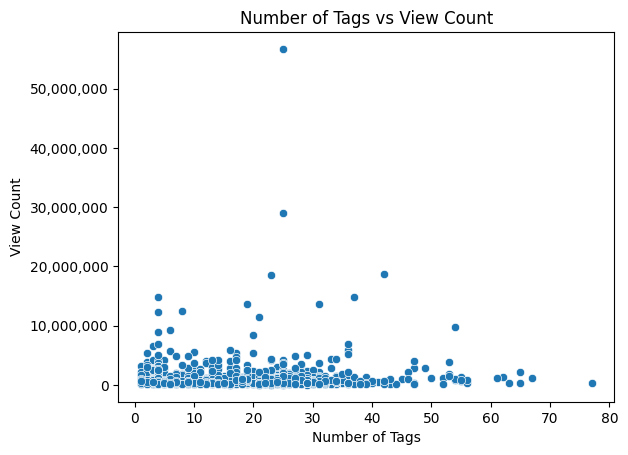

In [62]:
#getting number of tags per video
num_tags = df['tags'].str.len()

make_scatter(num_tags, df['view_count'], 'Number of Tags', 'View Count', 'Number of Tags vs View Count')

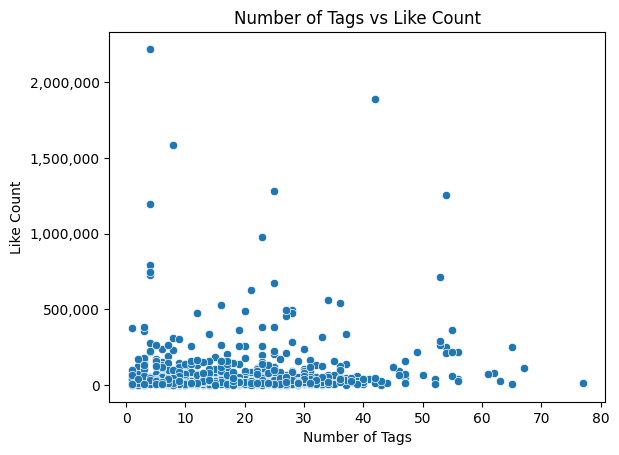

In [63]:
make_scatter(num_tags, df['like_count'], 'Number of Tags', 'Like Count', 'Number of Tags vs Like Count')

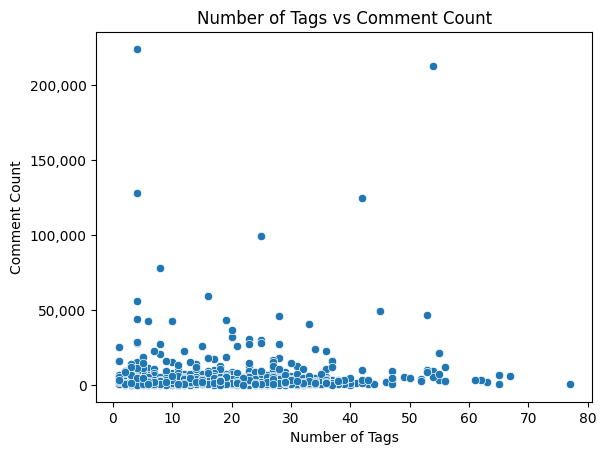

In [64]:
make_scatter(num_tags, df['comment_count'], 'Number of Tags', 'Comment Count', 'Number of Tags vs Comment Count')

Does Title Length (number of characters) relate to views?

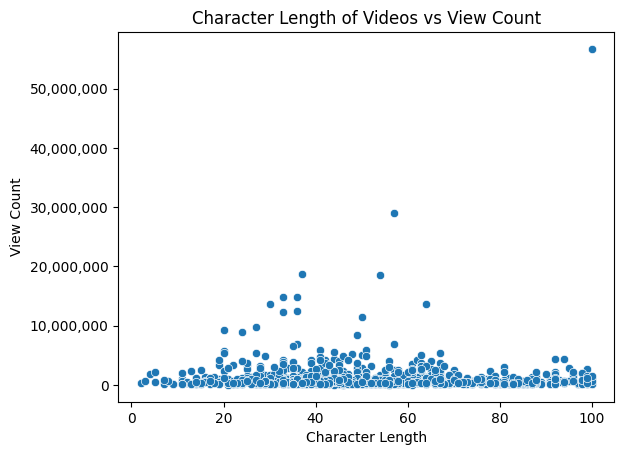

In [65]:
#getting character count for each video title
num_char = df['title'].str.len()

make_scatter(num_char, df['view_count'], 'Character Length', 'View Count', 'Character Length of Videos vs View Count')

Does title length (number of words) relate to views?

([<matplotlib.axis.XTick at 0x21ac612fdc0>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20')])

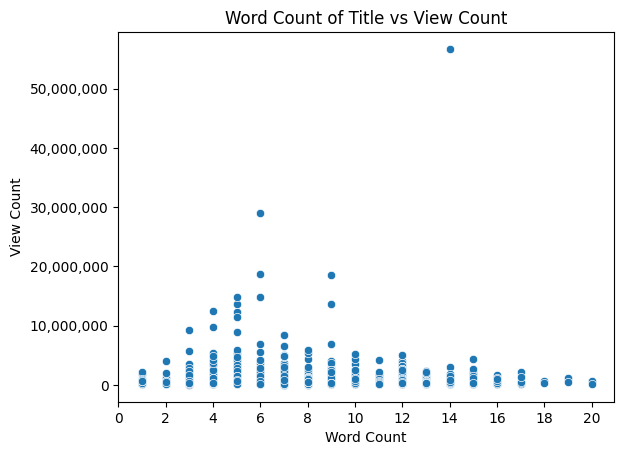

In [66]:
import re
#removing punctuation, then getting the word count for each video
word_counts = df['title'].apply(lambda x : re.sub(r'[^\w\s]', '', x)).str.split().str.len()

make_scatter(word_counts, df['view_count'], 'Word Count', 'View Count', 'Word Count of Title vs View Count')
plt.xticks(range(0, word_counts.max() + 1, 2))

What are the most popular categories in the youtube trending?

In [67]:
category_df = df['category_title'].value_counts().reset_index()
category_df = category_df.rename(columns = {
    'index' : 'category',
    'category_title' : 'count'
})

Text(0.5, 1.0, 'Most Categories in the Youtube Trending Page')

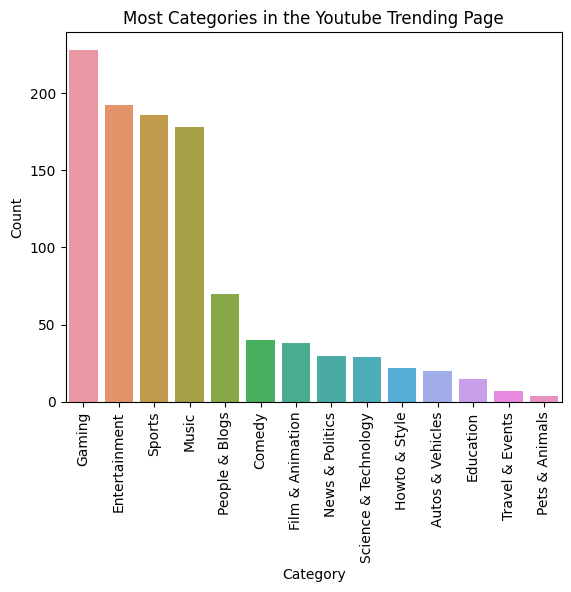

In [68]:
category_barplot = sns.barplot(data = category_df, x = 'category', y = 'count')
plt.xlabel('Category')
category_barplot.set_xticklabels(category_barplot.get_xticklabels(), rotation= 90)
plt.ylabel('Count')
plt.title('Most Categories in the Youtube Trending Page')

Looks like sports is the most trending, probably because of the NBA playoffs as of 4/19/2023.

Is there a relationship between having UPPERCASE TITLES and views?

For this question I calculated the percent of UPPERCASE characters in each title and compared it to view count.

In [69]:
#function that takes in a string and outputs the percent of uppercase letters in the string
def check_upper(s):
    l = []
    for char in s:
        l.append(char.isupper())
    return sum(l) / len(s)


In [70]:
percent_upper = df['title'].apply(lambda x : check_upper(x))

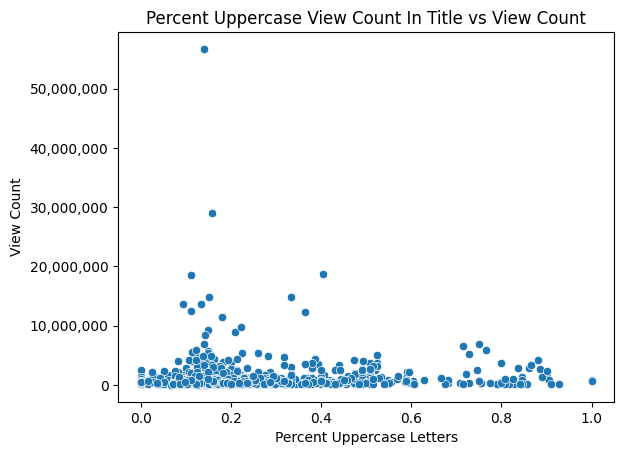

In [71]:
make_scatter(percent_upper, df['view_count'], 'Percent Uppercase Letters', 'View Count', 'Percent Uppercase View Count In Title vs View Count')

What is the relationship between views, likes, and comments?

<Axes: >

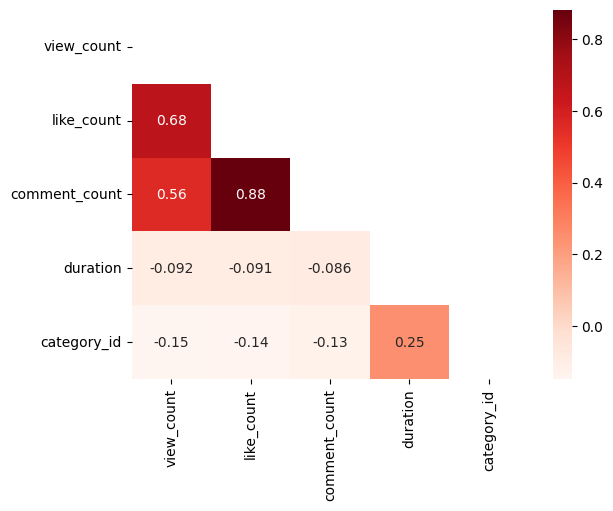

In [72]:
corr = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = 'Reds', mask = mask, annot = True)

Which video tags are associated with the highest view counts? You can use the tags variable to identify which tags are most commonly associated with the most viewed videos. This could help creators optimize their tagging strategy to increase the visibility of their videos.

Do a word cloud!

1. Subset top 100 videos by views
2. Extract all tags
3. Calculate mean number of views per tag
4. Word cloud

In [73]:
top_100 = df.sort_values(by = 'view_count', ascending = False)[:100].copy()

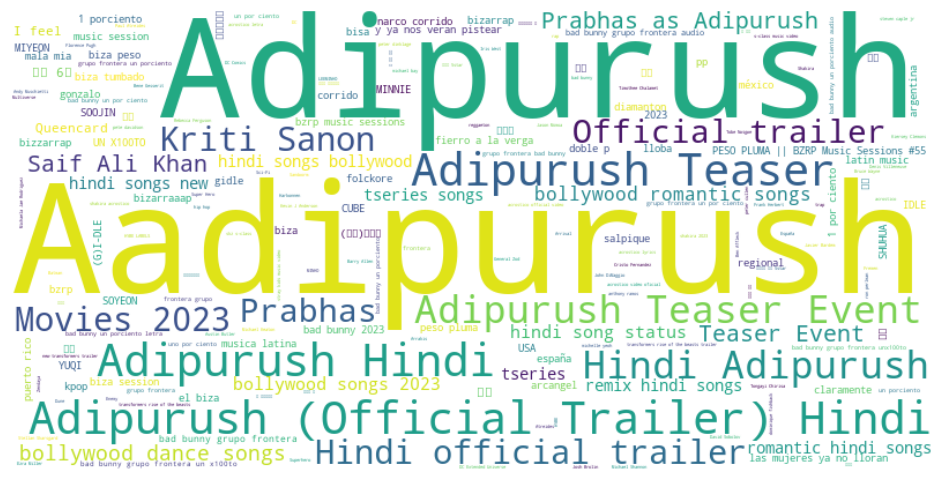

In [74]:
tags_df = top_100.explode('tags')
mean_views_per_tag = tags_df.groupby('tags')['view_count'].mean(numeric_only = True).to_dict()

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(mean_views_per_tag)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TO DO: 
Remove tags that appear less than mean(tag_counts)
update wordcloud

Collect data on the publication time of your videos. If you're using the YouTube Data API, the published_at variable in your dataset should provide this information. Make sure this variable is in a format that you can easily work with, such as a datetime object.

Create a new variable that extracts the hour of the day or day of the week from the published_at variable. You can use the strftime method in Python's datetime module to extract this information. For example, if your published_at variable is a datetime object, you can create a new variable that contains the hour of the day using the following code: df['hour_published'] = df['published_at'].dt.hour.

Create a new variable that represents the number of views per hour of publication or day of publication. You can use the groupby method in pandas to group your data by the hour of publication or day of publication and calculate the mean or median number of views per group. For example, if you want to calculate the mean number of views per hour of publication, you can use the following code: df_hour = df.groupby('hour_published')['view_count'].mean().

Visualize the relationship between publication time and number of views. You can use a line plot or a bar plot to show how the number of views varies with the hour of publication or day of publication. For example, if you want to create a line plot of the mean number of views per hour of publication, you can use the following code: df_hour.plot(kind='line').

Analyze the results of your visualization. Look for patterns in the data that suggest certain hours or days are associated with higher or lower viewership. You can use statistical tests to determine whether these differences are significant. For example, you can use a t-test to compare the mean number of views for videos published in the morning versus the afternoon.

By following these steps, you can gain insights into the best time to publish your videos to maximize their potential viewership.

## Which categories of videos tend to get more views, likes, and comments on average?

There is some data imbalance, but hopefully the script collects more data and fixes this.

In [75]:
grouped_by_category = df.groupby(by = 'category_title').mean(numeric_only = True)[['view_count', 'like_count', 'comment_count', 'duration']]

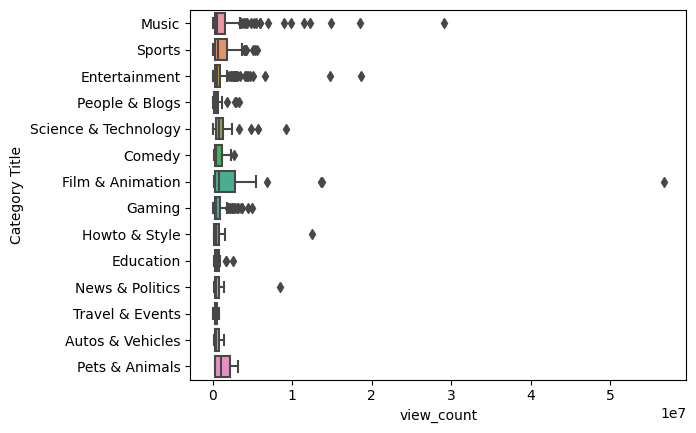

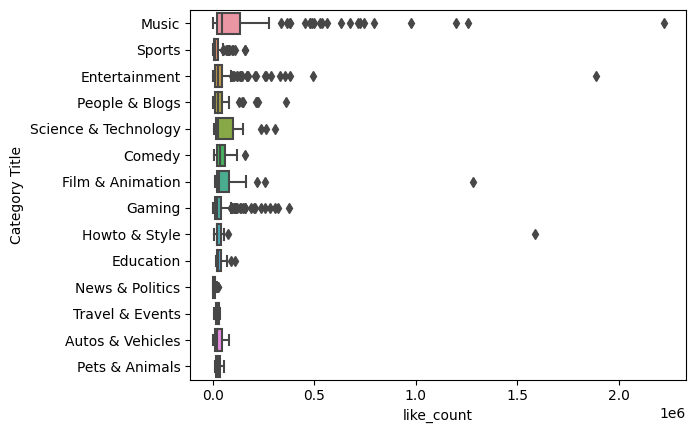

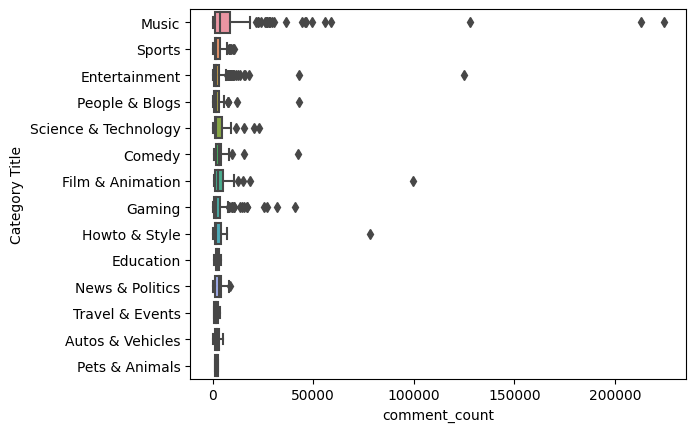

In [76]:
engagment_metrics = ['view_count', 'like_count', 'comment_count']
for i in engagment_metrics:
    sns.boxplot(x = df[i], y = df['category_title'])
    plt.xlabel(i)
    plt.ylabel('Category Title')
    plt.show()

## Are there any specific times or days of the week when video uploads tend to get more views, likes, and comments?

Days of the Week
- group by day of the week using the published_at column
- take the mean of view_count, like_count, comment_count


In [77]:
df.columns

Index(['published_at', 'video_id', 'channel_id', 'title', 'channel_title',
       'view_count', 'like_count', 'comment_count', 'tags', 'duration',
       'category_id', 'timestamp', 'category_title'],
      dtype='object')

In [78]:
time_df = df[['published_at', 'view_count', 'like_count', 'comment_count']].copy()
time_df['published_at'] = pd.to_datetime(time_df['published_at'])

time_df['day'] = time_df['published_at'].dt.day_name()

In [79]:
engagment_by_day = time_df.groupby('day').mean(numeric_only = True)
cat_weekdays = pd.Categorical(engagment_by_day, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
engagment_by_day = engagment_by_day.reindex(sorted_days)

In [80]:
def make_barplot(df, y, xlab):
    ax = sns.barplot(x = df.index, y = df[y], edgecolor = "black")
    plt.xlabel(xlab)
    plt.ylabel(y)
    plt.title(f"Mean {y} of Videos Split By Day Of Week")
    format_y_axis_commas(ax = ax)

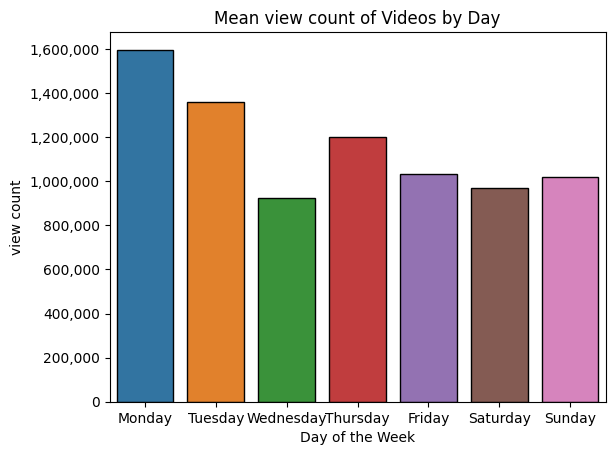

In [81]:
make_barplot(engagment_by_day, 'view_count', 'Day of the Week')
plt.title('Mean view count of Videos by Day')
plt.ylabel('view count');

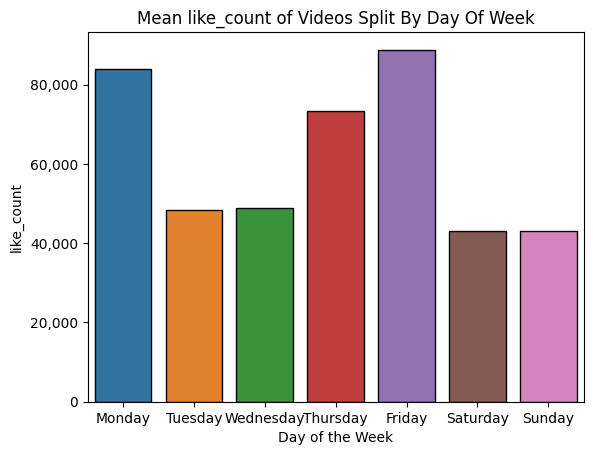

In [82]:
make_barplot(engagment_by_day, 'like_count', 'Day of the Week')

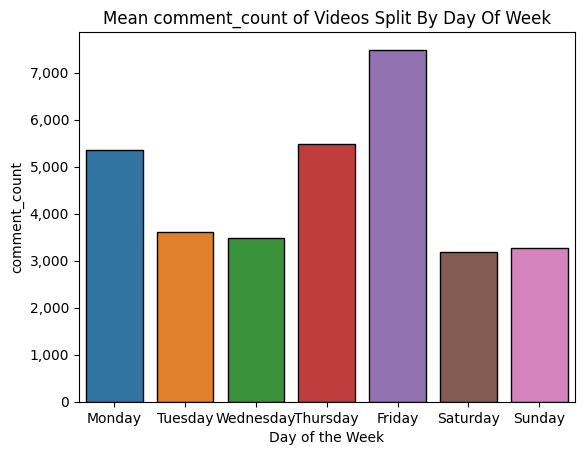

In [83]:
make_barplot(engagment_by_day, 'comment_count', 'Day of the Week')

2 sample t test to test weekday vs weekend

By the hour
- group by hour using the published_at column
- take the mean of view_count, like_count, comment_count


In [84]:
time_df['hour'] = time_df['published_at'].dt.hour


In [85]:
engagment_by_hour = time_df.groupby('hour').mean(numeric_only = True)

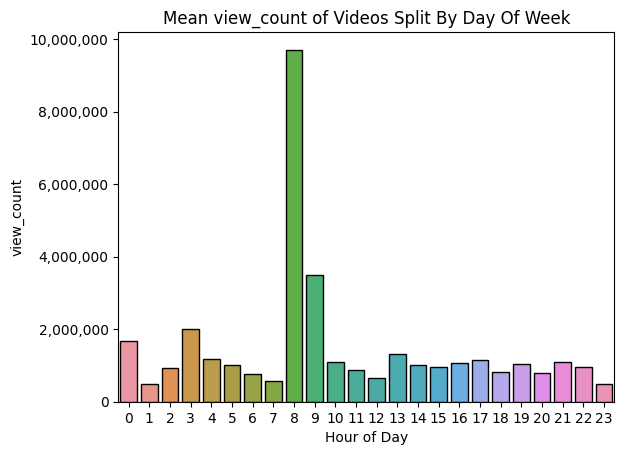

In [86]:
make_barplot(engagment_by_hour, 'view_count', 'Hour of Day')

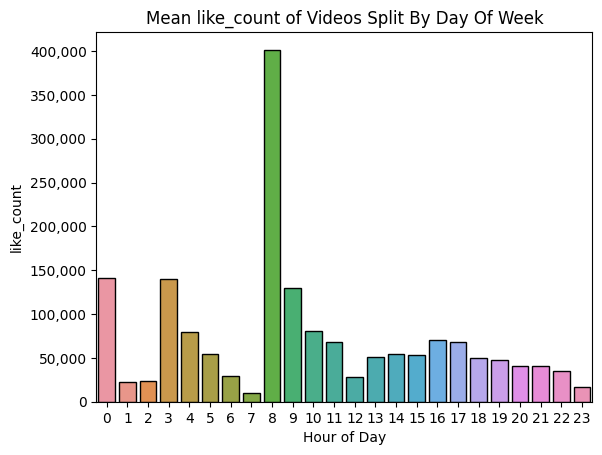

In [87]:
make_barplot(engagment_by_hour, 'like_count', 'Hour of Day')

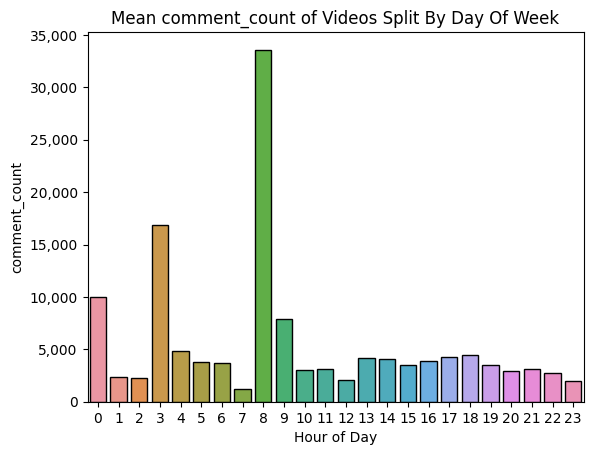

In [88]:
make_barplot(engagment_by_hour, 'comment_count', 'Hour of Day')

Is there any correlation between the length of the video and its view count, likes, and comments?

In [89]:
df.columns

Index(['published_at', 'video_id', 'channel_id', 'title', 'channel_title',
       'view_count', 'like_count', 'comment_count', 'tags', 'duration',
       'category_id', 'timestamp', 'category_title'],
      dtype='object')

In [90]:
# Calculate the Pearson correlation coefficient between video duration and engagement metrics
views_corr, views_pval = pearsonr(df['duration'], df['view_count'])
likes_corr, likes_pval = pearsonr(df['duration'], df['like_count'])
comments_corr, comments_pval = pearsonr(df['duration'], df['comment_count'])

# Print the results
print('Correlation between video duration and views: {:.2f}, p-value: {:.4f}'.format(views_corr, views_pval))
print('Correlation between video duration and likes: {:.2f}, p-value: {:.4f}'.format(likes_corr, likes_pval))
print('Correlation between video duration and comments: {:.2f}, p-value: {:.4f}'.format(comments_corr, comments_pval))

Correlation between video duration and views: -0.09, p-value: 0.0028
Correlation between video duration and likes: -0.09, p-value: 0.0029
Correlation between video duration and comments: -0.09, p-value: 0.0051


Looks like there is not a strong linear relationship between duration and engagement metrics.

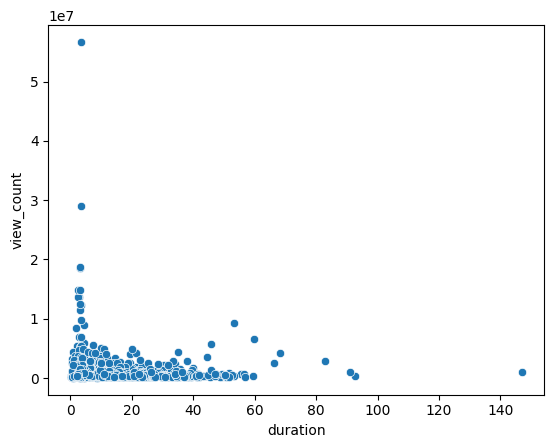

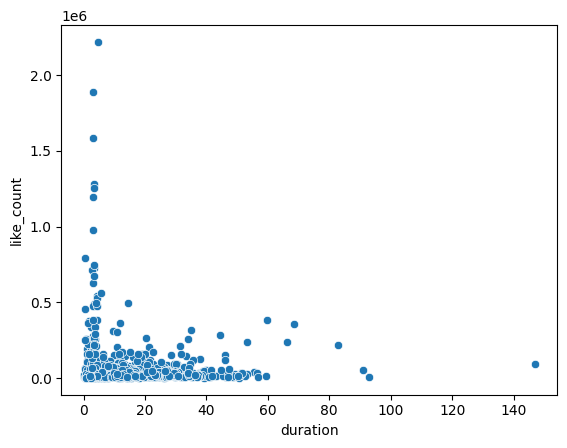

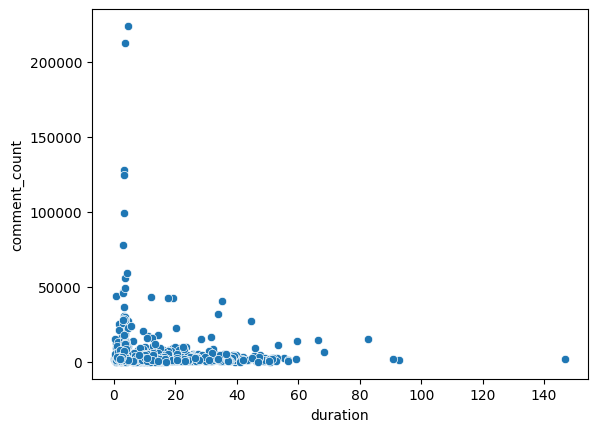

In [91]:
for i in engagment_metrics:
    sns.scatterplot(x = 'duration', y = i, data = df)
    plt.show()


Is there any correlation between the number of videos published by a channel and its overall view count, likes, and comments? 

# WORK ON LATER

1. Group by channel_id, get the count of each video
2. Do the mean / median engagments 
3. Plot

In [92]:
df.groupby('channel_id').count().sort_values(by = 'video_id', ascending = False)

,published_at,video_id,title,channel_title,view_count,like_count,comment_count,tags,duration,category_id,timestamp,category_title
channel_id,,,,,,,,,,,,
UCWJ2lWNubArHWmf3FIHbfcQ,34,34,34,34,34,34,34,34,34,34,34,34
UCLXzq85ijg2LwJWFrz4pkmw,7,7,7,7,7,7,7,7,7,7,7,7
UCB_qr75-ydFVKSF9Dmo6izg,6,6,6,6,6,6,6,6,6,6,6,6
UC9-OpMMVoNP5o10_Iyq7Ndw,6,6,6,6,6,6,6,6,6,6,6,6
UCiYcA0gJzg855iSKMrX3oHg,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
UCLRmIdRJgLfmdpJufmBhBuA,1,1,1,1,1,1,1,1,1,1,1,1
UCLSZJjsIItAr5lR3U1iLaMA,1,1,1,1,1,1,1,1,1,1,1,1
UCLdURO_8Q6RSGFCS8qCIoHA,1,1,1,1,1,1,1,1,1,1,1,1


Measuring engagement
    - likes + comments / views

In [93]:
df['engagement'] = (df['like_count'] + df['comment_count']) / df['view_count']

Which channels have the most engagement (likes and comments) relative to their view count, and what can be learned from their videos and audience engagement strategies?

Video categories with the most engagment

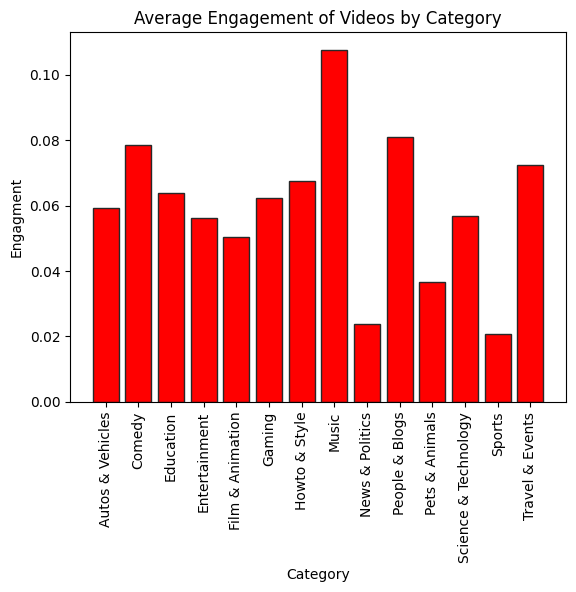

In [94]:
agg_cat = df.groupby('category_title')['engagement'].mean()
plt.bar(x = agg_cat.index, height = agg_cat, color = "#FF0000", edgecolor = '#282828');
plt.xticks(rotation=90);
plt.xlabel('Category');
plt.ylabel('Engagment');
plt.title('Average Engagement of Videos by Category');

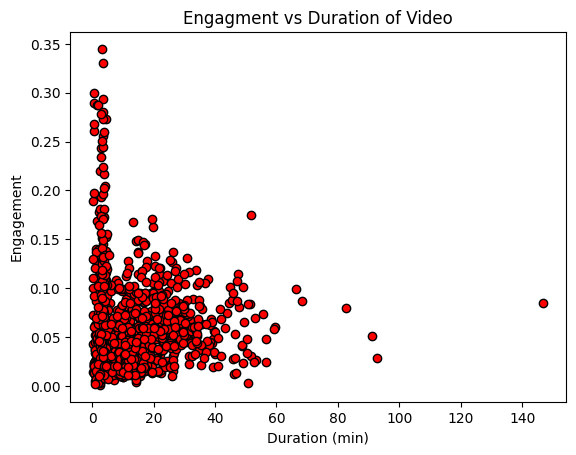

In [95]:
plt.scatter(x = df.duration, y = df.engagement, edgecolors = "black", color = "#FF0000" );
plt.xlabel('Duration (min)');
plt.ylabel('Engagement');
plt.title('Engagment vs Duration of Video');